In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'])
print(df.shape)
print(df.info())
print(df.describe(include='all'))

df = df.drop_duplicates(['Formatted Date'], keep='first')
print(df.describe())

(96453, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
                   Formatted Date        Summary Pre

<Axes: >

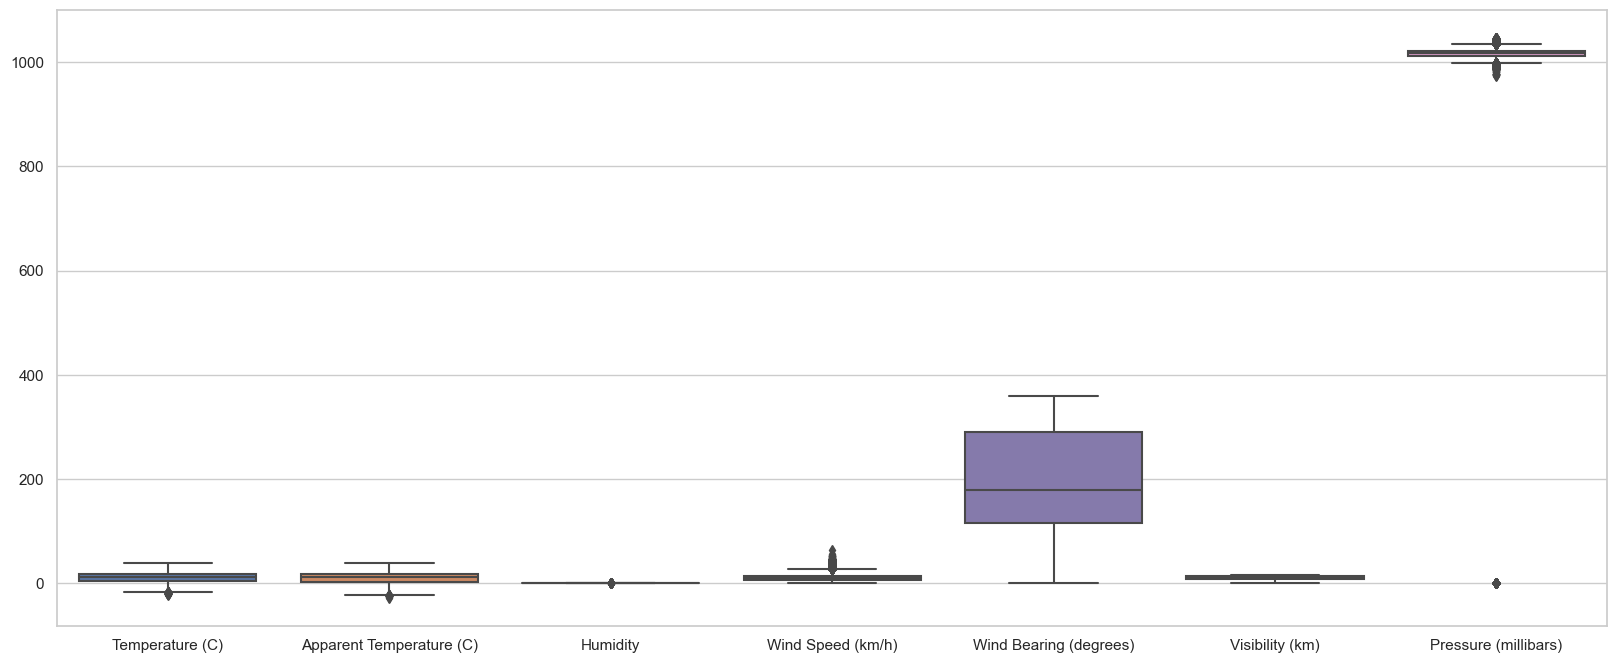

In [33]:
df = df.drop(columns=['Formatted Date','Loud Cover'])
df = df[df['Precip Type'].notna()]

sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data=df)

In [36]:
df = df[df['Humidity'] != 0.0]
df = df[df['Wind Speed (km/h)'] <= 60]
df = df[df['Pressure (millibars)'] > 0]
df.reset_index(inplace=True, drop=True)
print(df.shape)

(94601, 10)


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

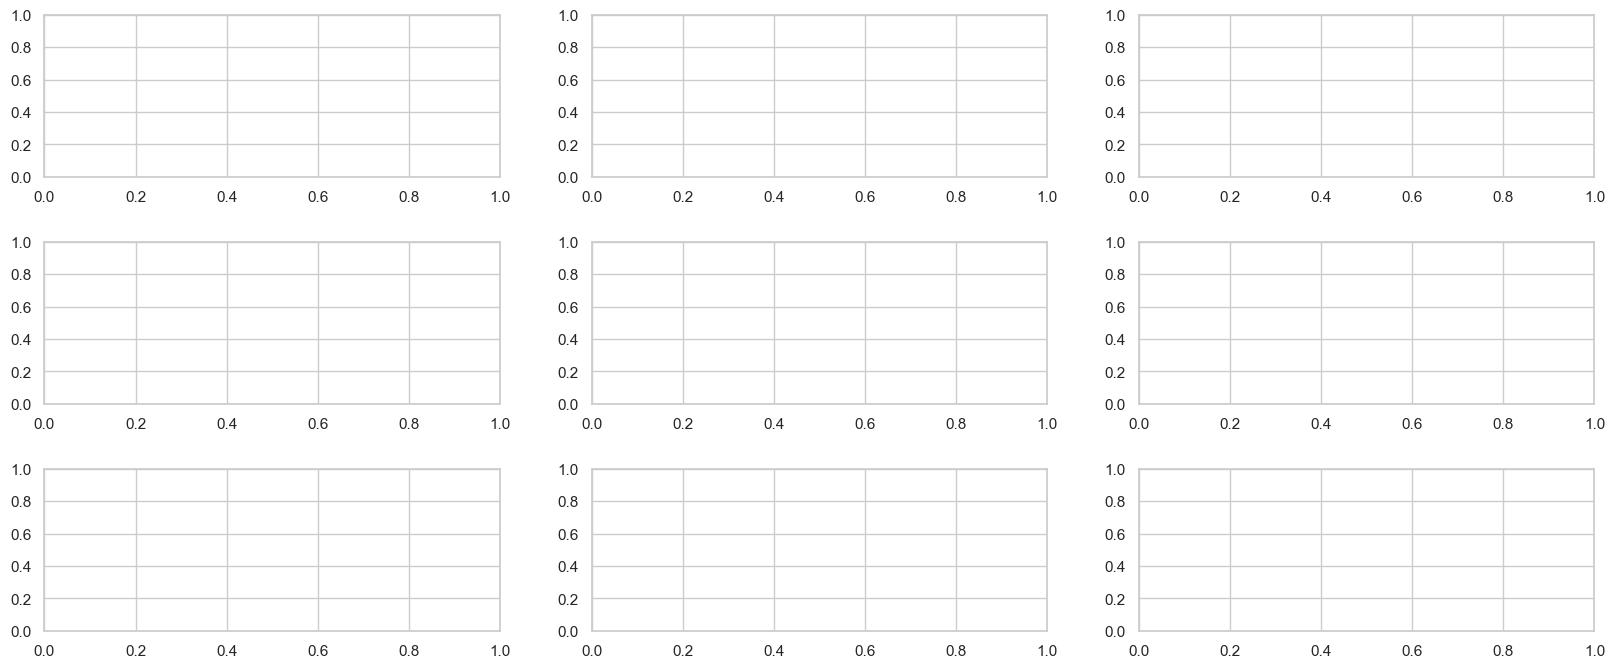

In [38]:
fig, axes = plt.subplots(3,3)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(df[2:9]):
    stats.probplot(df[column], dist="norm", plot=axes[int(i/3)][i%3])
    axes[int(i/3)][i%3].set_title(column)
plt.show()

In [40]:
from sklearn.preprocessing import FunctionTransformer

# squre root transformation for 'Wind Speed'
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(df[['Wind Speed (km/h)']])
df['feature_name'] = data_transformed
# power transformation with power of 2 for 'Humidity'
power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(df[['Humidity']])
df['feature_name'] = data_transformed

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [41]:
df['Precip Type'] = df['Precip Type'].astype('category').cat.codes
encoded_summary = pd.get_dummies(df['Summary'])
encoded_daily_summary = pd.get_dummies(df['Daily Summary'])
df = df.join(encoded_summary)
df = df.join(encoded_daily_summary)
df = df.drop(columns=['Daily Summary', 'Summary'])

In [51]:
from sklearn.model_selection import train_test_split

df_data = df.drop('Apparent Temperature (C)', axis=1)
df_target = pd.DataFrame(df['Apparent Temperature (C)'], columns=['Apparent Temperature (C)'])
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

std_columns = ['Temperature (C)',
               'Humidity',
               'Wind Speed (km/h)',
               'Wind Bearing (degrees)',
               'Visibility (km)',
               'Pressure (millibars)']

In [52]:
from sklearn.preprocessing import StandardScaler
# for feature data
scaler_train = StandardScaler()
scaler_train.fit(x_train[std_columns])
x_train_scaled = scaler_train.transform(x_train[std_columns])
x_test_scaled = scaler_train.transform(x_test[std_columns])
df_x_train_standardized = pd.DataFrame(x_train_scaled, columns = std_columns)
df_x_test_standardized = pd.DataFrame(x_test_scaled, columns = std_columns)
# for target data
scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train_scaled = scaler_target.transform(y_train)
y_test_scaled = scaler_target.transform(y_test)
df_y_train_standardized = pd.DataFrame(y_train_scaled, columns = ['Apparent Temperature (C)'])
df_y_test_standardized = pd.DataFrame(y_test_scaled, columns = ['Apparent Temperature (C)'])

<Axes: >

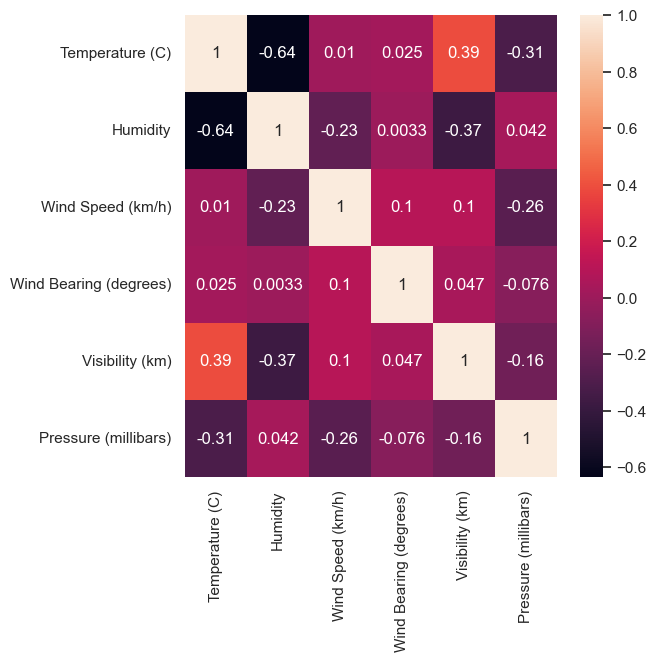

In [53]:
sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(df_x_train_standardized.corr(), annot=True)

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([9.81473193e-01, 9.13368988e-03, 4.99148962e-03, 3.06425743e-03,
       1.19251110e-03, 2.78868466e-05, 1.67350871e-05, 1.40334714e-05,
       9.53326001e-06, 7.04891066e-06, 5.93616238e-06, 5.03593887e-06,
       4.75142991e-06, 3.99328642e-06, 3.55733522e-06, 3.31745034e-06,
       2.96582422e-06, 2.78485289e-06, 2.52936935e-06, 2.24324320e-06,
       2.18284201e-06, 1.85300249e-06, 1.62910918e-06, 1.37835594e-06,
       1.23611809e-06, 1.18479533e-06, 1.16144044e-06, 1.10215694e-06,
       1.02189274e-06, 9.09170911e-07, 8.07254494e-07, 7.70507386e-07,
       6.88009760e-07, 6.75822702e-07, 6.15589551e-07, 5.92261271e-07,
       4.84922684e-07, 4.69485343e-07, 4.41193253e-07, 4.02601219e-07,
       3.86307815e-07, 3.84033223e-07, 3.65202086e-07, 3.50029253e-07,
       3.48776375e-07, 3.29623809e-07, 3.12398898e-07, 2.94043010e-07,
       2.85379474e-07, 2.65304213e-07, 2.51869729e-07, 2.45255149e-07,
       2.36974238e-07, 2.31428227e-07, 2.19677621e-07, 2.13933837e-07,
      

In [56]:
pca = PCA(n_components=11)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

## Model Training
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(pca_x_train, y_train)

In [57]:
predictions = lm.predict(pca_x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(pca_x_train, y_train)
print('Explained variance of the predictions(Train) :', round(score * 100, 4))

Mean squared error(Train) : 1.1372
Root mean squared error(Train) : 1.0664
Explained variance of the predictions(Train) : 99.0044


In [59]:
predictions = lm.predict(pca_x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(pca_x_test, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Mean squared error(Testing) : 1.1429
Root mean squared error(Testing) : 1.0691
Explained variance of the predictions(Testing) : 99.0095


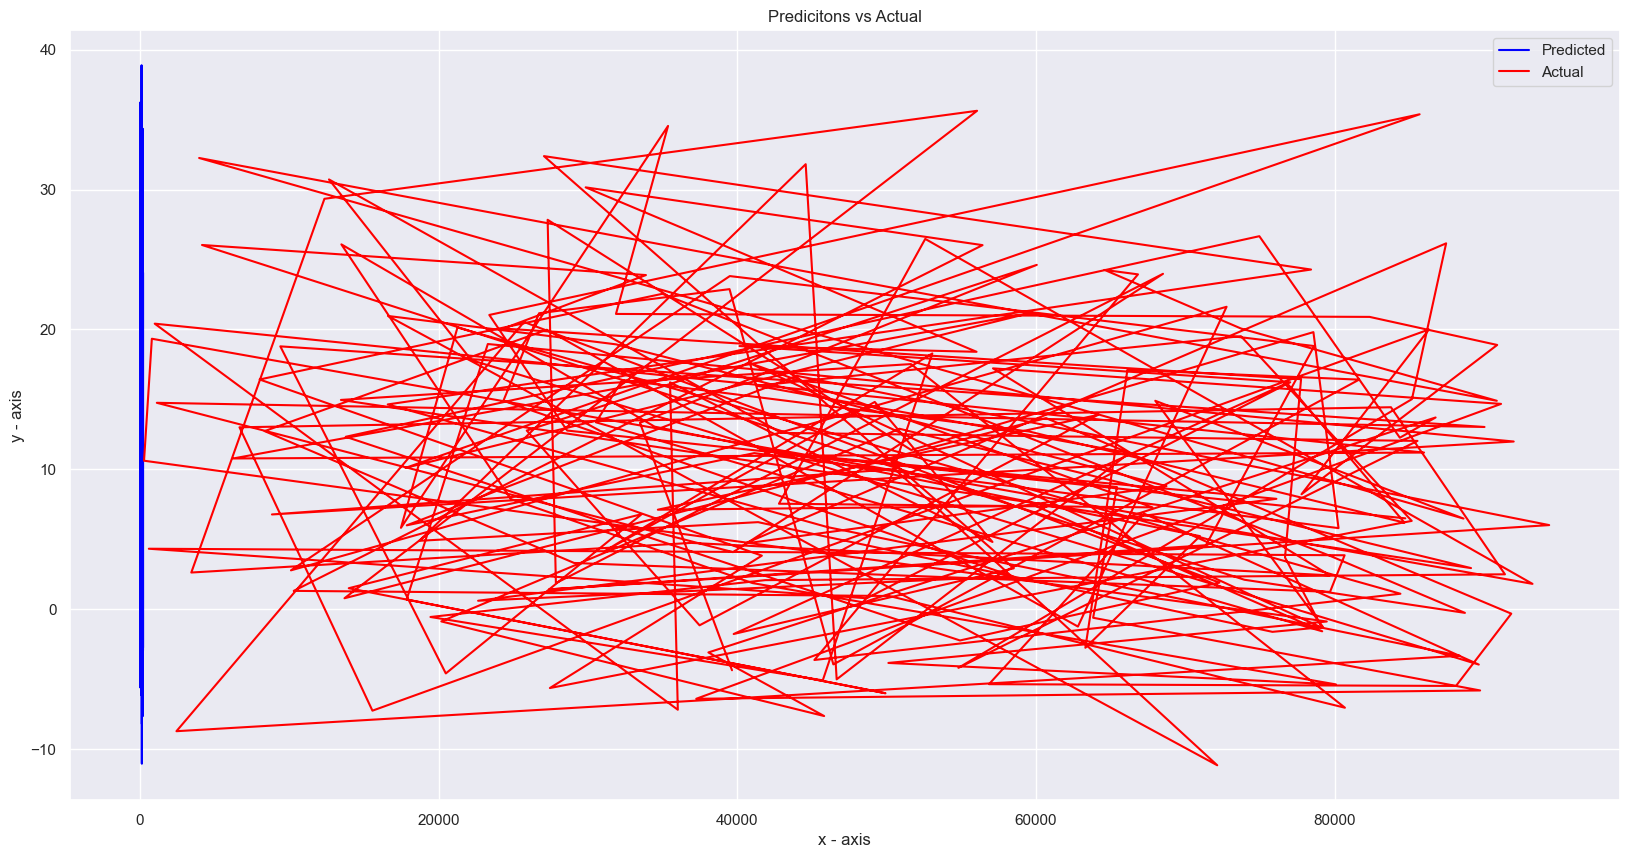

In [60]:
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(y_pred[:200], label='Predicted', color='blue')
plt.plot(y_test[:200], label='Actual', color='red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()
plt.show()